# Data Cleaning

## Importamos librerías

In [ ]:
# Manipulación de datos

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para clasificadores

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # Support Vector Classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import GaussianNB


# Otras librerías

from sklearn.model_selection import train_test_split, RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV, cross_val_score # for splitting the data into train and test samples
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # for model evaluation metrics
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from tabulate import tabulate

# MLP
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from keras.optimizers import Adam
from tensorflow.keras.metrics import Recall
from tensorflow.keras.callbacks import EarlyStopping

## Conectar con Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Cargamos los datos

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UAX/4º/TFG/TFG/Código /transactions.txt')
df.head()

,Unnamed: 0,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


# Data exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 30 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                786363 non-null  int64  
 1   accountNumber             786363 non-null  int64  
 2   customerId                786363 non-null  int64  
 3   creditLimit               786363 non-null  int64  
 4   availableMoney            786363 non-null  float64
 5   transactionDateTime       786363 non-null  object 
 6   transactionAmount         786363 non-null  float64
 7   merchantName              786363 non-null  object 
 8   acqCountry                781801 non-null  object 
 9   merchantCountryCode       785639 non-null  object 
 10  posEntryMode              782309 non-null  float64
 11  posConditionCode          785954 non-null  float64
 12  merchantCategoryCode      786363 non-null  object 
 13  currentExpDate            786363 non-null  o

In [ ]:
df.columns

Index(['Unnamed: 0', 'accountNumber', 'customerId', 'creditLimit',
       'availableMoney', 'transactionDateTime', 'transactionAmount',
       'merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode',
       'posConditionCode', 'merchantCategoryCode', 'currentExpDate',
       'accountOpenDate', 'dateOfLastAddressChange', 'cardCVV', 'enteredCVV',
       'cardLast4Digits', 'transactionType', 'echoBuffer', 'currentBalance',
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent',
       'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch',
       'isFraud'],
      dtype='object')

In [ ]:
df.dtypes.value_counts()

float64    11
object      9
int64       7
bool        3
Name: count, dtype: int64

Podemos ver que tenemos 30 columnas, donde 11 son valores flotantes, 7 son enteros, 9 son objetos y 3 son booleanos.

Elimamos la primera columna

In [ ]:
df = df.drop('Unnamed: 0', axis = 1)


## Análisis Descriptivo

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
accountNumber,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
customerId,786363.0,5.372326e+08,2.554211e+08,1.000881e+08,3.301333e+08,5.074561e+08,7.676200e+08,9.993896e+08
creditLimit,786363.0,1.075946e+04,1.163617e+04,2.500000e+02,5.000000e+03,7.500000e+03,1.500000e+04,5.000000e+04
availableMoney,786363.0,6.250725e+03,8.880784e+03,-1.005630e+03,1.077420e+03,3.184860e+03,7.500000e+03,5.000000e+04
transactionAmount,786363.0,1.369858e+02,1.477256e+02,0.000000e+00,3.365000e+01,8.790000e+01,1.914800e+02,2.011540e+03
posEntryMode,782309.0,9.049943e+00,1.677413e+01,2.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,9.000000e+01
posConditionCode,785954.0,3.271980e+00,9.809023e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
cardCVV,786363.0,5.444673e+02,2.615242e+02,1.000000e+02,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
enteredCVV,786363.0,5.441839e+02,2.615513e+02,0.000000e+00,3.100000e+02,5.350000e+02,7.850000e+02,9.980000e+02
cardLast4Digits,786363.0,4.757418e+03,2.996584e+03,0.000000e+00,2.178000e+03,4.733000e+03,7.338000e+03,9.998000e+03


In [ ]:
latex_code = df.describe().T.to_latex()

# Escribir a un archivo de texto
with open('data_description.tex', 'w') as f:
    f.write(latex_code)

### Valores duplicados

In [ ]:
df.duplicated().sum()

0

No hay valores duplicados

### Valores nulos

In [ ]:
df.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    4562
merchantCountryCode            724
posEntryMode                  4054
posConditionCode               409
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                698
echoBuffer                  786363
currentBalance                   0
merchantCity                786363
merchantState               786363
merchantZip                 786363
cardPresent                      0
posOnPremises               786363
recurringAuthInd            786363
expirationDateKeyInMatch         0
isFraud             

Observamos que hay columnas con un gran número de valores faltantes, equivalente al tamaño total del conjunto de datos. Por lo tanto, eliminamos esas columnas.

In [ ]:
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis = 1)

In [ ]:
df.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

Vamos a explorar los datos faltantes.

In [ ]:
print(df['acqCountry'].value_counts())
print(df['merchantCountryCode'].value_counts())
print(df['posEntryMode'].value_counts())
print(df['posConditionCode'].value_counts())
print(df['transactionType'].value_counts())

acqCountry
US     774709
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64
merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
Name: count, dtype: int64
posEntryMode
5.0     315035
9.0     236481
2.0     195934
90.0     19576
80.0     15283
Name: count, dtype: int64
posConditionCode
1.0     628787
8.0     149634
99.0      7533
Name: count, dtype: int64
transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: count, dtype: int64


Reemplazamos la información que es nula. Para las columnas `acqCountry`, `merchantCountryCode` y `transactionType` reemplazamos los valores nulos con `Información no disponible`.

Para las columnas `posEntryMode` y `posConditionCode` elimnamos las filas nulas debido a que no podemos reemplazar los valores con un valor porque no los sabemos

In [ ]:
columns_to_fill = ['acqCountry', 'merchantCountryCode', 'transactionType']
df[columns_to_fill] = df[columns_to_fill].fillna('Información no disponible')

columns_to_dropna = ['posEntryMode', 'posConditionCode']
df.dropna(subset=columns_to_dropna, inplace=True)


In [ ]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [ ]:
df.shape

(781903, 23)

### Análisis de la Variable Objetivo `isFraud`

In [ ]:
df['isFraud'].value_counts()

isFraud
False    769776
True      12127
Name: count, dtype: int64

In [ ]:
fraud_percentage = (df['isFraud'].value_counts() / len(df)) * 100
fraud_percentage

isFraud
False    98.44904
True      1.55096
Name: count, dtype: float64

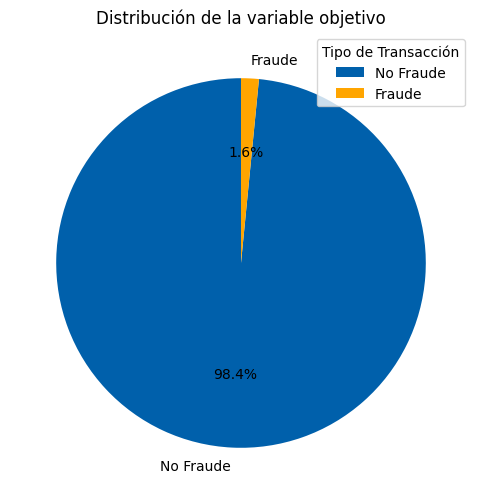

In [ ]:
# DIvidimos
fraud_counts = df['isFraud'].value_counts()
fraud_labels = ['No Fraude', 'Fraude']

plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=fraud_labels, autopct='%1.1f%%', startangle=90, colors=['#0060ab', 'orange'])
plt.title('Distribución de la variable objetivo')
plt.legend(title="Tipo de Transacción", labels=['No Fraude', 'Fraude'], loc="best")

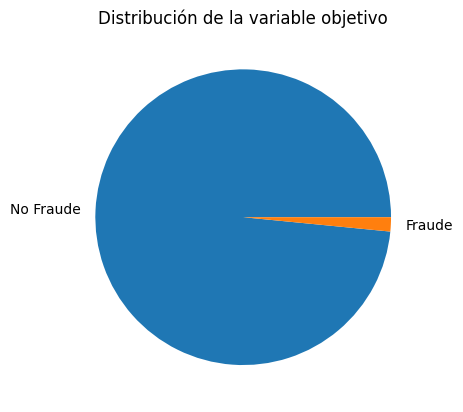

In [ ]:
df['isFraud'].value_counts().plot(kind='pie', labels=['No Fraude', 'Fraude'])
plt.title('Distribución de la variable objetivo')
plt.ylabel('')
plt.show()

Como podemos observar el conjunto de datos presenta un desequilibrio significativo, con un número mucho mayor de transacciones no fraudulentas (773,946) en comparación con las transacciones fraudulentas (12,417).

Una transacción de reversión se refiere a situaciones en las que un cliente ha enviado el dinero pero aún no ha sido recibido por la cuenta del comerciante. Mientras aún está siendo procesada, la transacción puede ser revertida.

In [ ]:
df['transactionType'].value_counts()

transactionType
PURCHASE                     740944
REVERSAL                      20187
ADDRESS_VERIFICATION          20076
Información no disponible       696
Name: count, dtype: int64

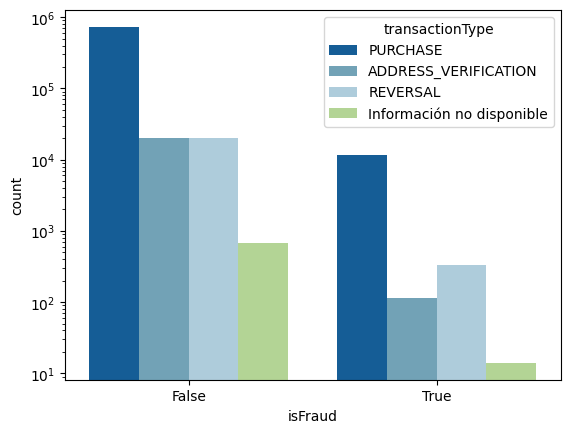

In [ ]:
# Definir los colores
colors = {
    'PURCHASE': '#0060AB',  # Azul fuerte
    'ADDRESS_VERIFICATION': '#67A7C1',  # Azul claro
    'REVERSAL': '#A6CEE3',  # Azul más claro
    'Información no disponible': '#B2DF8A'  # Verde suave
}

sns.countplot(x="isFraud", data=df, hue="transactionType", palette=colors)
plt.yscale('log')
plt.show()

## Estudio por columnas

### `cardLast4Digits`, `accountNumber` and `customerId`

Eliminamos estas columnas porque no son relevantes para nuestro análisis. Estas columnas pueden utilizarse para identificar un gasto exacto, por lo que necesitamos eliminarlas.

In [ ]:
df = df.drop(columns=['accountNumber', 'customerId', 'cardLast4Digits'])

### `cardCVV` and `enteredCVV`

Primero creamos una nueva columna booleana para saber si cardCVV y enteredCVV son iguales.

In [ ]:
df['CVV_match'] = df['cardCVV'] == df['enteredCVV']

Ahora las eliminamos, ya que no son útiles para nuestro análisis

In [ ]:
df = df.drop(columns=['cardCVV', 'enteredCVV'])

### `transactionDateTime`

Lo convertimos a datatime

In [ ]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

Extraemos las componentes temporales

In [ ]:
df['transactionYear'] = df['transactionDateTime'].dt.year
df['transactionMonth'] = df['transactionDateTime'].dt.month
df['transactionDay'] = df['transactionDateTime'].dt.day
df['transactionHour'] = df['transactionDateTime'].dt.hour

Realizamos una función para categorizar las horas del día y así hacer un análisis mas exhaustivo del momento en el que se producen los fraudes

In [ ]:
def categorize_hour(hour):
    if 0 <= hour < 7:
        return 'Night'
    elif 7 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

# Aplicar la función para crear una nueva columna 'timeOfDay'
df['timeOfDay'] = df['transactionHour'].apply(categorize_hour)

In [ ]:
# Calcular la cantidad de transacciones fraudulentas y no fraudulentas para cada franja horaria
fraud_by_time = df.groupby(['timeOfDay', 'isFraud']).size().unstack(fill_value=0)

# Calcular la proporción de transacciones fraudulentas en cada franja horaria
fraud_by_time['fraudRatio'] = fraud_by_time[True] / (fraud_by_time[True] + fraud_by_time[False])

# Mostrar el resultado
print(fraud_by_time)

isFraud     False  True  fraudRatio
timeOfDay                          
Afternoon  160435  2644    0.016213
Evening    225097  3424    0.014983
Morning    160352  2565    0.015744
Night      223892  3494    0.015366


Text(0, 0.5, 'Número de Transacciones')

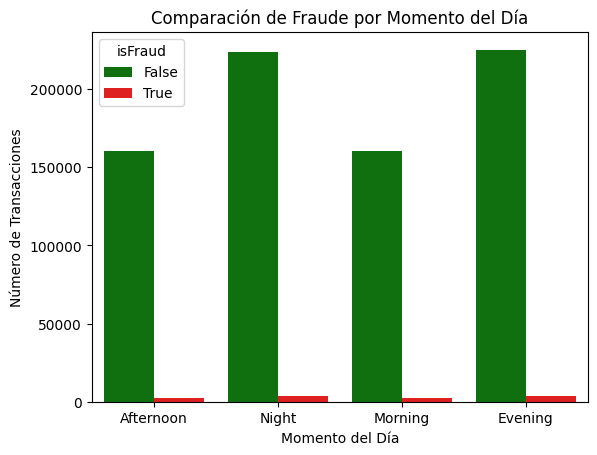

In [ ]:
# Define los colores
colores = {False: "green", True: "red"}
sns.countplot(x='timeOfDay', hue='isFraud', data=df, palette = colores)
plt.title('Comparación de Fraude por Momento del Día')
plt.xlabel('Momento del Día')
plt.ylabel('Número de Transacciones')

Vamos a graficar la proporción de transacciones fraudulentas en cada franja horaria

Text(0.5, 1.0, 'Proporción de Transacciones Fraudulentas por Franja Horaria')

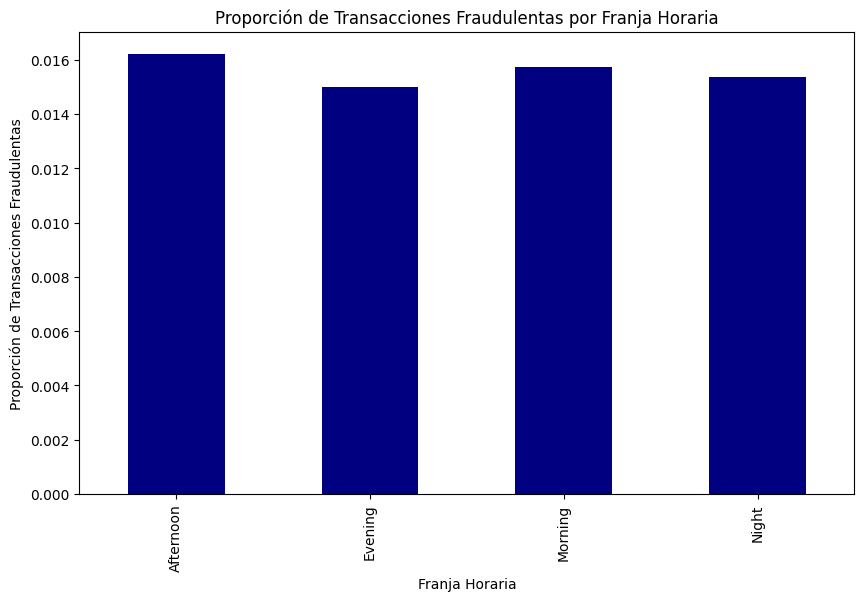

In [ ]:
plt.figure(figsize=(10, 6))
fraud_by_time['fraudRatio'].plot(kind='bar', color='navy')
plt.xlabel('Franja Horaria')
plt.ylabel('Proporción de Transacciones Fraudulentas')
plt.title('Proporción de Transacciones Fraudulentas por Franja Horaria')

### `dateOfLastAddressChange`

Calculamos la cantidad de días desde que cambiaron la dirección.

In [ ]:
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

Calcular el tiempo pasado desde el último cambio de dirección

In [ ]:
df['days_since_last_address_change'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days

### `merchantName`

In [ ]:
df['merchantName'].value_counts()

merchantName
Uber                             25459
Lyft                             25366
oldnavy.com                      16903
staples.com                      16897
alibaba.com                      16861
                                 ...  
Sprint Communications #561941        2
Golds Gym #956354                    2
Curves #849125                       1
TMobile Wireless #602341             1
EZ Wireless #149871                  1
Name: count, Length: 2489, dtype: int64

Vamos a realizar la práctica de "Grouping Rare Categories". Vamos a seleccionar las 50 principales comerciantes donde ocurren más fraudes.

In [ ]:
top_50_merchants = df[df['isFraud'] == True]['merchantName'].value_counts().head(50).index.tolist()
top_50_merchants

['Lyft',
 'ebay.com',
 'Fresh Flowers',
 'Uber',
 'cheapfast.com',
 'walmart.com',
 'sears.com',
 'oldnavy.com',
 'staples.com',
 'alibaba.com',
 'gap.com',
 'amazon.com',
 'target.com',
 'apple.com',
 'discount.com',
 'American Airlines',
 'Fresh eCards',
 'Blue Mountain Online Services',
 'Next Day Online Services',
 'Blue Mountain eCards',
 'Fresh Online Services',
 'Mobile eCards',
 'Next Day eCards',
 'Delta Airlines',
 'Regal Cinemas #05791',
 'EZ Putt Putt #551896',
 'EZ Putt Putt #69446',
 'EZ Putt Putt #40513',
 'Regal Cinemas #276341',
 'Regal Cinemas #729464',
 'EZ Putt Putt #804489',
 'EZ Putt Putt #755869',
 'United Airlines',
 'EZ Putt Putt #240241',
 'EZ Putt Putt #503815',
 'Convenient Auto Services',
 'EZ Putt Putt #982199',
 'Virgin Airlines',
 'Icelandic Airlines',
 'AMC #692956',
 'Dinosaur Restaurant',
 'AMC #128743',
 'Best Pub',
 'San Francisco Post',
 'AMC #79863',
 'NY BBQ',
 'AMC #74121',
 'Washington Tire',
 'AMC #145832',
 'ethanallen.com']

Ahora vamos a crear una lista de los 50 principales comerciantes más comunes en general

In [ ]:
most_common_merchants = df['merchantName'].value_counts().head(50).index.tolist()
most_common_merchants

['Uber',
 'Lyft',
 'oldnavy.com',
 'staples.com',
 'alibaba.com',
 'apple.com',
 'walmart.com',
 'ebay.com',
 'cheapfast.com',
 'target.com',
 'amazon.com',
 'sears.com',
 'discount.com',
 'gap.com',
 'Fresh Online Services',
 'Blue Mountain eCards',
 'Fresh Flowers',
 'Next Day eCards',
 'Next Day Online Services',
 'Fresh eCards',
 'Blue Mountain Online Services',
 'Mobile eCards',
 'Apple iTunes',
 'Play Store',
 'EZ Putt Putt #40513',
 'EZ Putt Putt #982199',
 'AMC #145832',
 'Regal Cinemas #05791',
 'EZ Putt Putt #69446',
 'Regal Cinemas #276341',
 'AMC #724446',
 'AMC #191138',
 'AMC #692956',
 'AMC #606218',
 'EZ Putt Putt #503815',
 'EZ Putt Putt #804489',
 'EZ Putt Putt #551896',
 'EZ Putt Putt #755869',
 'AMC #74121',
 'AMC #79863',
 'EZ Putt Putt #240241',
 'AMC #128743',
 'Regal Cinemas #729464',
 'AMC #706324',
 'AMC #552863',
 'American Airlines',
 'United Airlines',
 'Delta Airlines',
 'Icelandic Airlines',
 'Virgin Airlines']

Itera sobre una de las listas (por ejemplo, most_common_merchants) y crea columnas dummy para cada comerciante en esa lista:

In [ ]:
for merchant in most_common_merchants:
    df[merchant] = (df['merchantName'] == merchant).astype(int)

In [ ]:
df.shape

(781903, 75)

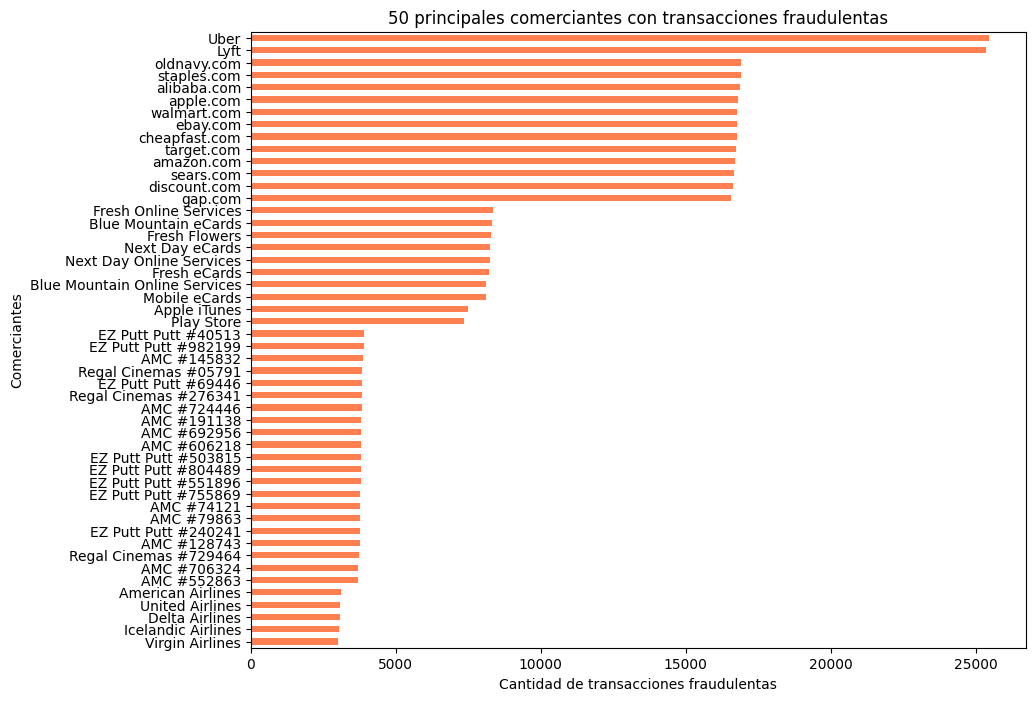

In [ ]:
# Obtener los 50 principales comerciantes fraudulentos y contar la cantidad de transacciones para cada uno
top_50_fraudulent_merchants = df['merchantName'].value_counts().head(50)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
top_50_fraudulent_merchants.plot(kind='barh', color='coral')
plt.xlabel('Cantidad de transacciones fraudulentas')
plt.ylabel('Comerciantes')
plt.title('50 principales comerciantes con transacciones fraudulentas')
plt.gca().invert_yaxis()  # Invertir el eje y para que el comerciante con más transacciones fraudulentas aparezca arriba
plt.show()


## Get_dummies

### `merchantCategoryCode`

In [ ]:
print(df['merchantCategoryCode'].value_counts())

merchantCategoryCode
online_retail           201036
fastfood                111540
entertainment            79705
food                     75055
online_gifts             65883
rideshare                50825
hotels                   33890
fuel                     23713
subscriptions            22771
auto                     21516
health                   19001
personal care            18858
airline                  15327
mobileapps               14851
online_subscriptions     11002
furniture                 7394
food_delivery             6000
gym                       2186
cable/phone               1350
Name: count, dtype: int64


In [ ]:
print(df['acqCountry'].value_counts())
print(df['merchantCountryCode'].value_counts())


acqCountry
US                           770305
Información no disponible      4540
MEX                            3116
CAN                            2409
PR                             1533
Name: count, dtype: int64
merchantCountryCode
US                           774090
MEX                            3129
CAN                            2411
PR                             1554
Información no disponible       719
Name: count, dtype: int64


In [ ]:
print(df['transactionType'].value_counts())
print(df['cardPresent'].value_counts())
print(df['expirationDateKeyInMatch'].value_counts())
print(df['timeOfDay'].value_counts())

transactionType
PURCHASE                     740944
REVERSAL                      20187
ADDRESS_VERIFICATION          20076
Información no disponible       696
Name: count, dtype: int64
cardPresent
False    431014
True     350889
Name: count, dtype: int64
expirationDateKeyInMatch
False    780865
True       1038
Name: count, dtype: int64
timeOfDay
Evening      228521
Night        227386
Afternoon    163079
Morning      162917
Name: count, dtype: int64


In [ ]:
df = pd.get_dummies(df, columns=['timeOfDay', 'merchantCategoryCode','merchantCountryCode', 'acqCountry', 'expirationDateKeyInMatch', 'cardPresent', 'transactionType'])

## Categorical data to numerical data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781903 entries, 0 to 786362
Columns: 109 entries, creditLimit to transactionType_REVERSAL
dtypes: bool(43), datetime64[ns](2), float64(5), int32(4), int64(52), object(3)
memory usage: 419.8+ MB


Eliminamos estas columnas:
* `currentExpDate` y `accountOpenDate`: no son relevantes para nuestro análisis
* `dateOfLastAddressChange` y `transactionDateTime`: ya las hemos utilizado y analizado
* `merchantName`: hemos aplicado dummies para diferenciar las 50 empresas más frecuentes

In [ ]:
df = df.drop(['currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'transactionDateTime', 'merchantName'], axis = 1)

In [ ]:
df.head()

,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,currentBalance,isFraud,CVV_match,transactionYear,transactionMonth,...,acqCountry_PR,acqCountry_US,expirationDateKeyInMatch_False,expirationDateKeyInMatch_True,cardPresent_False,cardPresent_True,transactionType_ADDRESS_VERIFICATION,transactionType_Información no disponible,transactionType_PURCHASE,transactionType_REVERSAL
0,5000,5000.0,98.55,2.0,1.0,0.0,False,True,2016,8,...,False,True,True,False,True,False,False,False,True,False
1,5000,5000.0,74.51,9.0,1.0,0.0,False,True,2016,10,...,False,True,True,False,False,True,False,False,True,False
2,5000,5000.0,7.47,9.0,1.0,0.0,False,True,2016,11,...,False,True,True,False,True,False,False,False,True,False
3,5000,5000.0,7.47,9.0,1.0,0.0,False,True,2016,12,...,False,True,True,False,True,False,False,False,True,False
4,5000,5000.0,71.18,2.0,1.0,0.0,False,True,2016,3,...,False,True,True,False,False,True,False,False,True,False


Vamos a reemplazar todos los valore booleaos a 1 y 0

In [ ]:
df.replace({True: 1, False: 0}, inplace=True)

In [ ]:
df.dtypes.value_counts()


int64      95
float64     5
int32       4
Name: count, dtype: int64

Guardamos datos, para organizar los ficheros

In [ ]:
df.to_csv('transactions_cleaned.csv', index=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 781903 entries, 0 to 786362
Columns: 104 entries, creditLimit to transactionType_REVERSAL
dtypes: float64(5), int32(4), int64(95)
memory usage: 614.4 MB


In [ ]:
# df['posEntryMode'] = df['posEntryMode'].astype(float)
# df['posConditionCode'] = df['posConditionCode'].astype(float)